## 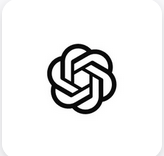  

## Proposition

Find all customers who placed an order in 2016 but did not place an order in 2020.

## Functional Specification

### Query Name

Customers with 2016 Orders but No 2020 Orders

### Description

This query retrieves customers who made orders in the year 2016 but did not make any orders in the year 2020. It uses two subqueries to identify customers meeting this condition.

### Inputs

- **CustomerID**: The unique identifier for each customer.
- **OrderDate**: The date when the order was placed.

### Outputs

- **CustomerID**: The unique identifier for the customer.
- **CustomerName**: The name of the customer.

### Steps

1. Select distinct customers who placed orders in 2016.
2. Filter out customers who also placed orders in 2020.

### Assumptions

- The data is available in the `Sales.Customers` and `Sales.Orders` tables.
- The `CustomerID` is unique across the `Sales.Customers` table.

### Example Output

| CustomerID | CustomerName |
| --- | --- |
| 102 | John Doe |
| 205 | Jane Smith |

In [ ]:
use NewWideWorldImporters;
go
SELECT DISTINCT C.CustomerID, C.CustomerName
FROM Sales.Customers AS C
WHERE C.CustomerID IN (
    SELECT O.CustomerID
    FROM Sales.Orders AS O
    WHERE YEAR(O.OrderDate) = 2016
)
AND C.CustomerID NOT IN (
    SELECT O.CustomerID
    FROM Sales.Orders AS O
    WHERE YEAR(O.OrderDate) = 2020
);

## Proposition

List suppliers along with their top 2 least expensive stock items.

## Functional Specification

**Query Name**: Suppliers and Top 2 Least Expensive Items

**Description**: This query retrieves the ID and name of each supplier along with the ID, name, and unit price of their two least expensive stock items.

**Inputs**: None

**Outputs**:
- Supplier ID
- Supplier Name
- Stock Item ID
- Stock Item Name
- Unit Price

**Steps**:
1. Select supplier details (ID and name) from the `Suppliers` table.
2. Use `CROSS APPLY` to join each supplier with their corresponding stock items.
3. For each supplier, select the top 2 least expensive items based on unit price.
4. Retrieve stock item details such as item ID, item name, and unit price.

**Assumptions**:
- Each supplier can have multiple stock items.
- `TOP 2` is used to select only the two items with the lowest unit prices for each supplier.

**Example Output**:

| SupplierID | SupplierName  | StockItemID | StockItemName     | UnitPrice |
|------------|---------------|-------------|-------------------|-----------|
| 1          | Supplier A    | 101         | Item A1           | 12.50     |
| 1          | Supplier A    | 102         | Item A2           | 15.00     |
| 2          | Supplier B    | 201         | Item B1           | 8.75      |
| 2          | Supplier B    | 202         | Item B2           | 11.00     |


In [ ]:
use NewWideWorldImporters;
go
SELECT S.SupplierID, S.SupplierName, P.StockItemID, P.StockItemName, P.UnitPrice
FROM Purchasing.Suppliers AS S
CROSS APPLY (
    SELECT TOP 2 SI.StockItemID, SI.StockItemName, SI.UnitPrice
    FROM Warehouse.StockItems AS SI
    WHERE SI.SupplierID = S.SupplierID
    ORDER BY SI.UnitPrice ASC
) AS P;


### Proposition

Find all customers who ordered the product with `StockItemID = 13` in the year 2016 but did not place any orders in the year 2022.

### Functional Specification

**Query Name**: `Customers_Ordered_Item13_2016_Not_2022`

**Description**:  
This query retrieves customers who purchased a specific product (`StockItemID = 13`) in the year 2016, but had no orders at all in the year 2022.

**Inputs**:  
- `StockItemID` = 13
- `OrderDate` = 2016, 2022

**Outputs**:  
- `CustomerID`: The unique identifier of the customer.
- `CustomerName`: The name of the customer.

**Steps**:
1. **Join Tables**:  
   Join the `Sales.Customers`, `Sales.Orders`, and `Sales.OrderLines` tables to find customers who ordered the specified item.
2. **Filter by Order Date (2016)**:  
   Filter orders where `OrderDate` is in 2016.
3. **Exclude Customers with Orders in 2022**:  
   Exclude customers who placed any orders in the year 2022 using a subquery.

**Assumptions**:  
- The `Sales.Customers`, `Sales.Orders`, and `Sales.OrderLines` tables are accurate and up to date.
- Customer IDs are unique across the `Sales.Customers` table.

**Example Output**:
| CustomerID | CustomerName      |
|------------|-------------------|
| 101        | Alpha Industries  |
| 102        | Beta Traders      |

In [ ]:
use NewWideWorldImporters;
go
SELECT DISTINCT C.CustomerID, C.CustomerName
FROM Sales.Customers AS C
JOIN Sales.Orders AS O ON C.CustomerID = O.CustomerID
JOIN Sales.OrderLines AS OL ON O.OrderID = OL.OrderID
WHERE OL.StockItemID = 13
AND YEAR(O.OrderDate) = 2016
AND C.CustomerID NOT IN (
    SELECT O.CustomerID
    FROM Sales.Orders AS O
    WHERE YEAR(O.OrderDate) = 2022
);

### Proposition
Identify all customers who have placed orders totaling more than $10,000, excluding those who have placed any orders in the year 2022.

### Functional Specification

#### Query Name
**HighValueCustomers_Excluding2022**

#### Description
The query retrieves a distinct list of customers who have placed orders with a total value greater than $10,000. Customers who have placed any order in the year 2022 are excluded from the result.

#### Inputs
- **Sales.Customers**: Table containing customer details.
- **Sales.Orders**: Table containing order information.
- **Sales.OrderLines**: Table containing individual line items within orders.

#### Outputs
- **CustomerID**: Unique identifier of the customer.
- **CustomerName**: Name of the customer.

#### Steps
1. Join `Sales.Customers` (aliased as `C`) with `Sales.Orders` (aliased as `O`) on `CustomerID`.
2. Filter orders such that the total value of items in each order (calculated as `UnitPrice * Quantity`) exceeds $10,000.
3. Ensure that customers have not placed any orders during the year 2022.
4. Select distinct `CustomerID` and `CustomerName` of the filtered customers.

#### Assumptions
- The `Sales.OrderLines` table provides the unit price and quantity for each line item in an order.
- Orders are represented in the `Sales.Orders` table with `OrderDate` specifying the date of the order.

#### Example Output
| CustomerID | CustomerName     |
|------------|------------------|
| 123        | Acme Corporation |
| 456        | Tech Solutions   |
| 789        | Green Supplies   |

In [ ]:
use NewWideWorldImporters;
go
SELECT DISTINCT C.CustomerID, C.CustomerName
FROM Sales.Customers AS C
JOIN Sales.Orders AS O ON C.CustomerID = O.CustomerID
WHERE O.OrderID IN (
    SELECT OL.OrderID
    FROM Sales.OrderLines AS OL
    GROUP BY OL.OrderID
    HAVING SUM(OL.UnitPrice * OL.Quantity) > 10000
)
AND C.CustomerID NOT IN (
    SELECT O.CustomerID
    FROM Sales.Orders AS O
    WHERE YEAR(O.OrderDate) = 2022
);

### Proposition

Retrieve each supplier along with the highest priced stock item they supply, including item details such as StockItemID, StockItemName, and UnitPrice.

### Functional Specification

**Query Name**: `TopPricedItemPerSupplier`

**Description**: This query retrieves information about each supplier and their highest priced stock item. The result includes the SupplierID, SupplierName, StockItemID, StockItemName, and UnitPrice for the highest priced item supplied by each supplier.

**Inputs**: 
- Supplier and stock item data from tables `Purchasing.Suppliers` and `Warehouse.StockItems`.

**Outputs**:
- SupplierID (Supplier Identifier)
- SupplierName (Name of the Supplier)
- StockItemID (Identifier for Stock Item)
- StockItemName (Name of Stock Item)
- UnitPrice (Price per Unit of Stock Item)

**Steps**:
1. Select data from the `Purchasing.Suppliers` table.
2. Use `CROSS APPLY` to find the top-priced stock item for each supplier from `Warehouse.StockItems`.
3. Retrieve the `StockItemID`, `StockItemName`, and `UnitPrice` for each supplier's highest-priced stock item.
4. Sort the items in descending order of `UnitPrice` and select the top-priced item per supplier.

**Assumptions**:
- Each supplier has at least one associated stock item.

**Example Output**:
| SupplierID | SupplierName | StockItemID | StockItemName | UnitPrice |
|------------|--------------|-------------|---------------|-----------|
| 1          | Supplier A   | 101         | Item Alpha    | 150.00    |
| 2          | Supplier B   | 205         | Item Beta     | 200.00    |

In [ ]:
use NewWideWorldImporters;
go
SELECT S.SupplierID, S.SupplierName, P.StockItemID, P.StockItemName, P.UnitPrice
FROM Purchasing.Suppliers AS S
CROSS APPLY (
    SELECT TOP 1 SI.StockItemID, SI.StockItemName, SI.UnitPrice
    FROM Warehouse.StockItems AS SI
    WHERE SI.SupplierID = S.SupplierID
    ORDER BY SI.UnitPrice DESC
) AS P;


# Proposition

Identify all suppliers who provided stock items that became available in 2016 but did not have any stock items added in 2022.

# Functional Specification

## Query Name
Distinct Suppliers by Availability Year

## Description
This query retrieves a list of distinct suppliers who provided stock items that became available in the year 2016, but ensures these suppliers did not add any new stock items in 2022.

## Inputs
- `Purchasing.Suppliers` table containing supplier details.
- `Warehouse.StockItems` table containing stock item details, including the year they became available.

## Outputs
- A list of suppliers (`SupplierID`, `SupplierName`) meeting the specified criteria.

## Steps
1. Select distinct `SupplierID` and `SupplierName` from the `Suppliers` table.
2. Use a subquery to filter suppliers who provided stock items that were marked as valid starting in 2016.
3. Use another subquery to exclude suppliers who added stock items in 2022.
4. Ensure only distinct suppliers are returned.

## Assumptions
- The `ValidFrom` column in the `Warehouse.StockItems` table contains the date when the stock items became available.
- The `Suppliers` table and `StockItems` table are appropriately linked by `SupplierID`.

## Example Output
| SupplierID | SupplierName      |
|------------|-------------------|
| 1          | ABC Supplies Ltd. |
| 3          | Global Traders    |

In [ ]:
use NewWideWorldImporters;
go
SELECT DISTINCT S.SupplierID, S.SupplierName
FROM Purchasing.Suppliers AS S
WHERE S.SupplierID IN (
    SELECT SI.SupplierID
    FROM Warehouse.StockItems AS SI
    WHERE YEAR(SI.ValidFrom) = 2016
)
AND S.SupplierID NOT IN (
    SELECT SI.SupplierID
    FROM Warehouse.StockItems AS SI
    WHERE YEAR(SI.ValidFrom) = 2022
);

### Proposition
Find customers who placed an order in 2021 with at least one item priced over $1,000, but did not place any orders in 2022.

### Functional Specification

**Query Name**: HighValueCustomers2021

**Description**: This query retrieves distinct customers who ordered products in 2021 with a unit price greater than $1,000, ensuring that they did not place any orders in 2022.

**Inputs**:
- Sales data from the `Sales.Customers`, `Sales.Orders`, and `Sales.OrderLines` tables.

**Outputs**:
- `CustomerID`: Unique identifier of the customer.
- `CustomerName`: Name of the customer.

**Steps**:
1. Join the `Sales.Customers` table with `Sales.Orders` and `Sales.OrderLines` tables.
2. Filter orders where `UnitPrice` is greater than $1,000.
3. Ensure the orders are from the year 2016.
4. Exclude customers who placed orders in 2022.

**Assumptions**:
- All relevant tables (`Sales.Customers`, `Sales.Orders`, `Sales.OrderLines`) contain accurate and up-to-date sales data.
- `CustomerID` uniquely identifies each customer in the system.

**Example Output**:
| CustomerID | CustomerName   |
|------------|----------------|
| 1001       | John Doe       |
| 1023       | Jane Smith     |
| 1054       | Michael Johnson|

In [ ]:
use NewWideWorldImporters;
go
SELECT DISTINCT C.CustomerID, C.CustomerName
FROM Sales.Customers AS C
JOIN Sales.Orders AS O ON C.CustomerID = O.CustomerID
JOIN Sales.OrderLines AS OL ON O.OrderID = OL.OrderID
WHERE OL.UnitPrice > 1000
AND YEAR(O.OrderDate) = 2016
AND C.CustomerID NOT IN (
    SELECT O.CustomerID
    FROM Sales.Orders AS O
    WHERE YEAR(O.OrderDate) = 2022
);

## Proposition
Find the highest-priced stock item of a specific color (with `ColorID = 2`) for each supplier.

## Functional Specification

### Query Name
Highest-Priced Stock Item by Supplier

### Description
This query retrieves the supplier ID and name, along with the highest-priced stock item of a specific color (where `ColorID = 2`) for each supplier.

### Inputs
- Suppliers (`Purchasing.Suppliers`)
- Stock Items (`Warehouse.StockItems`)

### Outputs
- Supplier ID
- Supplier Name
- Stock Item ID
- Stock Item Name
- Unit Price of the Stock Item

### Steps
1. Retrieve supplier details from `Purchasing.Suppliers`.
2. For each supplier, find the highest-priced stock item where `ColorID = 2` by using a correlated subquery (`CROSS APPLY`).
3. Order the stock items by unit price in descending order and select the top item.

### Assumptions
- Each supplier may have zero or more stock items with the specified color.
- If a supplier has no items with `ColorID = 2`, they will not be included in the results.

### Example Output
| SupplierID | SupplierName      | StockItemID | StockItemName    | UnitPrice |
|------------|-------------------|-------------|------------------|-----------|
| 1          | ABC Supplies Ltd  | 101         | Blue Widget      | 25.50     |
| 2          | XYZ Products Inc  | 205         | Blue Gadget      | 19.75     |

In [ ]:
use NewWideWorldImporters;
go
SELECT S.SupplierID, S.SupplierName, P.StockItemID, P.StockItemName, P.UnitPrice
FROM Purchasing.Suppliers AS S
CROSS APPLY (
    SELECT TOP 1 SI.StockItemID, SI.StockItemName, SI.UnitPrice
    FROM Warehouse.StockItems AS SI
    WHERE SI.SupplierID = S.SupplierID AND SI.ColorID = 2
    ORDER BY SI.UnitPrice DESC
) AS P;


### Proposition
Find all customers who placed an order between January 1, 2016, and March 31, 2016, but did not place any orders between October 1, 2020, and December 31, 2020.

### Functional Specification

**Query Name**: Customers With Orders in 2016 But Not in Late 2020

**Description**: This query retrieves the unique list of customers who made a purchase during the first quarter of 2016 but did not make any purchases during the last quarter of 2020.

**Inputs**:
- Start and end dates for the order history (`'2016-01-01'`, `'2016-03-31'`, `'2020-10-01'`, `'2020-12-31'`)

**Outputs**:
- `CustomerID`: The unique identifier for the customer.
- `CustomerName`: The name of the customer.

**Steps**:
1. Select the distinct `CustomerID` and `CustomerName` from the `Sales.Customers` table.
2. Filter the customers whose `CustomerID` appears in the orders placed between January 1, 2016, and March 31, 2016.
3. Exclude customers whose `CustomerID` appears in orders placed between October 1, 2020, and December 31, 2020.

**Assumptions**:
- Customers may have placed multiple orders.
- Only the distinct customers are returned in the output.

**Example Output**:
| CustomerID | CustomerName    |
|------------|-----------------|
| 1          | ABC Corporation |
| 2          | XYZ Enterprises |

In [ ]:
use NewWideWorldImporters;
go
SELECT DISTINCT C.CustomerID, C.CustomerName
FROM Sales.Customers AS C
WHERE C.CustomerID IN (
    SELECT O.CustomerID
    FROM Sales.Orders AS O
    WHERE O.OrderDate BETWEEN '2016-01-01' AND '2016-03-31'
)
AND C.CustomerID NOT IN (
    SELECT O.CustomerID
    FROM Sales.Orders AS O
    WHERE O.OrderDate BETWEEN '2020-10-01' AND '2020-12-31'
);

### Proposition
Retrieve the list of customers who have placed orders only in even years and not in any odd years.

### Functional Specification

**Query Name**: Customers With Orders Only In Even Years

**Description**: This query identifies all customers who have placed orders in even-numbered years, ensuring that these customers did not place any orders in odd-numbered years.

**Inputs**:
- Sales.Orders table: Provides information about customer orders, including order dates and customer IDs.
- Sales.Customers table: Provides information about customer details.

**Outputs**:
- `CustomerID`: Unique identifier for each customer.
- `CustomerName`: Name of each customer.

**Steps**:
1. Select customers (`CustomerID` and `CustomerName`) from the `Sales.Customers` table.
2. Use a subquery to filter customers who have orders only in even years.
3. Ensure that these customers did **not** place orders in odd-numbered years using another subquery.

**Assumptions**:
- Each customer can have multiple orders.
- The year of the order is determined from the `OrderDate` column.
- Orders have complete and valid date information.

**Example Output**:

| CustomerID | CustomerName        |
|------------|---------------------|
| 1001       | John Doe            |
| 1003       | Jane Smith          |
| 1020       | Michael Johnson     |

In [ ]:
use NewWideWorldImporters;
go
SELECT DISTINCT C.CustomerID, C.CustomerName
FROM Sales.Customers AS C
WHERE C.CustomerID IN (
    SELECT O.CustomerID
    FROM Sales.Orders AS O
    WHERE YEAR(O.OrderDate) % 2 = 0
)
AND C.CustomerID NOT IN (
    SELECT O.CustomerID
    FROM Sales.Orders AS O
    WHERE YEAR(O.OrderDate) % 2 <> 0
);


### Proposition
Find all customers who have placed orders containing products supplied by multiple suppliers, excluding Supplier ID 10.

### Functional Specification

#### Query Name
Customers with Multiple Suppliers Excluding Supplier ID 10

#### Description
This query retrieves distinct customers who have ordered products supplied by more than one supplier, excluding those supplied by Supplier ID 10.

#### Inputs
- `Sales.Customers`
- `Sales.Orders`
- `Sales.OrderLines`
- `Warehouse.StockItems`

#### Outputs
- `CustomerID` (ID of the customer)
- `CustomerName` (Name of the customer)

#### Steps
1. Join the `Sales.Customers` table to `Sales.Orders` using `CustomerID`.
2. Join `Sales.Orders` to `Sales.OrderLines` using `OrderID`.
3. Join `Sales.OrderLines` to `Warehouse.StockItems` using `StockItemID`.
4. Filter the results to exclude products from `SupplierID` 10.
5. Group the results by `CustomerID` and `CustomerName`.
6. Return only customers who have ordered from more than one distinct supplier.

#### Assumptions
- The data tables are complete and properly normalized.
- The column `SupplierID` in `Warehouse.StockItems` accurately identifies the supplier for each stock item.

#### Example Output
| CustomerID | CustomerName      |
|------------|-------------------|
| 1001       | John Doe          |
| 1005       | Jane Smith        |
| 1010       | ABC Corporation   |

In [ ]:
use NewWideWorldImporters;
go
SELECT DISTINCT C.CustomerID, C.CustomerName
FROM Sales.Customers AS C
JOIN Sales.Orders AS O ON C.CustomerID = O.CustomerID
JOIN Sales.OrderLines AS OL ON O.OrderID = OL.OrderID
JOIN Warehouse.StockItems AS SI ON OL.StockItemID = SI.StockItemID
WHERE SI.SupplierID <> 10
GROUP BY C.CustomerID, C.CustomerName
HAVING COUNT(DISTINCT SI.SupplierID) > 1;